<a href="https://colab.research.google.com/github/hagane-zd/HaganePyPJ/blob/main/plotcut2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 1.5  0.5]
 [ 0.5 -0.5]]


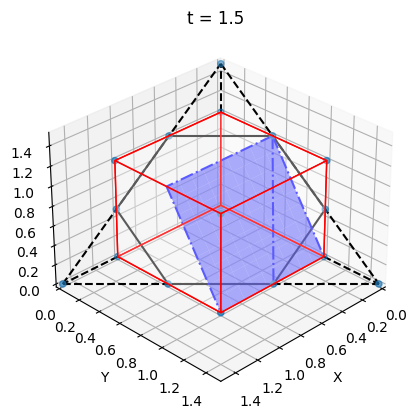

In [1]:
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d


t=1.5

points = np.array([[0, 0, 0],
                  [1, 0, 0],
                  [1, 1, 0],
                  [0, 1, 0],
                  [0, 0, 1],
                  [1, 0, 1],
                  [1, 1, 1],
                  [0, 1, 1],
                  [t, 0, 0],
                  [0, t, 0],
                  [0, 0, t],
                  [t-1, 1, 0],
                  [1, t-1, 0],
                  [1, 0 , t-1],
                  [t- 1, 0, 1],
                  [0, t-1, 1],
                  [0, 1, t-1]])
Z = points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

###破線部分
ax.add_line(art3d.Line3D([t, 0], [0, 0], [0, t], linestyle='--',color='k'))
ax.add_line(art3d.Line3D([0, 0], [0, t], [t, 0], linestyle='--',color='k'))
ax.add_line(art3d.Line3D([t, 0], [0, t], [0, 0], linestyle='--',color='k'))

ax.add_line(art3d.Line3D([0, 0], [0, 0], [1, t], linestyle='--',color='k'))
ax.add_line(art3d.Line3D([1, t], [0, 0], [0, 0], linestyle='--',color='k'))
ax.add_line(art3d.Line3D([0, 0], [1, t], [0, 0], linestyle='--',color='k'))

###内部(1回目切断)
##線
ax.add_line(art3d.Line3D([1, 1], [0, t - 1], [t - 1,  0 ], color='k'))
ax.add_line(art3d.Line3D([1, t - 1], [t - 1, 1], [0,  0 ], color='k'))
ax.add_line(art3d.Line3D([t - 1, 0], [1, 1], [0, t - 1], color='k'))
ax.add_line(art3d.Line3D([0, 0], [1,  t - 1], [t - 1, 1], color='k'))
ax.add_line(art3d.Line3D([0, t - 1], [t - 1,  0], [1, 1], color='k'))
ax.add_line(art3d.Line3D([t - 1, 1], [0,  0], [1, t - 1], color='k'))

##面
def f(x, y):
    ret = t - (x + y)
    print(ret)
    return ret

X1, Y1 = np.mgrid[0:t, 0:t]
Z1 = f(X1, Y1)

xmin,xmax=0,t
ymin,ymax=0,t
zmin,zmax=0,t
ax.set_xlim3d(xmin, xmax)
ax.set_ylim3d(ymin, ymax)
ax.set_zlim3d(zmin, zmax)
#ax.plot_surface(X1, Y1, Z1, facecolor='k',alpha=0.5)


###内部(2回目切断)
##線
ax.add_line(art3d.Line3D([0, 1], [t - 1, t - 1], [1, 1], linestyle='-.',color='b'))
ax.add_line(art3d.Line3D([0, 0], [t - 1, 1], [1, 0], linestyle='-.',color='b'))
ax.add_line(art3d.Line3D([1, 1], [t - 1, 1], [1, 0], linestyle='-.',color='b'))
ax.add_line(art3d.Line3D([0, t - 1], [t - 1, 1], [1, 0], linestyle='-.',color='b'))

##面
x2 = np.linspace(0, 1, 10)
y2 = np.linspace(t - 1, 1, 10)

X2, Y2 = np.meshgrid(x2, y2)
Z2 = (1 - Y2)*2
ax.plot_surface(X2, Y2, Z2, facecolor='b',alpha=0.5)

ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])

verts = [[Z[0],Z[1],Z[2],Z[3]],
         [Z[4],Z[5],Z[6],Z[7]],
         [Z[0],Z[1],Z[5],Z[4]],
         [Z[2],Z[3],Z[7],Z[6]],
         [Z[1],Z[2],Z[6],Z[5]],
         [Z[4],Z[7],Z[3],Z[0]]]

ax.add_collection3d(Poly3DCollection(verts, facecolors='w', linewidths=1, edgecolors='r', alpha=.20))
ax.set_title("t = {}".format(t))
ax.view_init(elev=30, azim=45)

plt.show()

